# Analyse bivariée

## Analyse des liaisons entre deux variables quantitatives:

#### Analyse graphique

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
df = pd.read_csv('/Users/hadjer/Desktop/dataset_GAB.csv')
df

,nbr_semaine,saison,Plage_horaire,Week_End,Evenements_Religieux,Evenements_Nationaux,Gab_Code,GabAgence,CodeAgence,CodeWilaya,...,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,Nbr_Transaction_Evenements_Religieux,retrait_Evenements_Religieux,Nbr_Transaction_Evenements_Nationaux,retrait_Evenements_Nationaux,evenements,nbr_transaction_evenement,retrait_evenement
0,1,hiver,après-midi,0,NaN,"""jour l An""",800005027,"""CHERAGA \r""",17030,16,...,1655000,0,0,0,0,32,345000,"""jour l An""",32,345000
1,1,hiver,après-midi,0,NaN,"""jour l An""",800010027,"""DAR EL BEIDA \r""",17070,16,...,2169000,0,0,0,0,43,1008000,"""jour l An""",43,1008000
2,1,hiver,après-midi,0,NaN,"""jour l An""",800019027,"""ORAN USTO \r""",17100,31,...,1810000,0,0,0,0,20,355000,"""jour l An""",20,355000
3,1,hiver,après-midi,0,NaN,"""jour l An""",800022027,"""BEJAIA \r""",17130,6,...,709000,0,0,0,0,15,168000,"""jour l An""",15,168000
4,1,hiver,après-midi,0,NaN,"""jour l An""",800023027,"""BEJAIA \r""",17130,6,...,279000,0,0,0,0,5,80000,"""jour l An""",5,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,1,NaN,NaN,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,...,2000,1,2000,0,0,0,0,NaN,0,0
18433,53,hiver,soir,1,NaN,NaN,800029027,"""BORDJ EL KIFFAN \r""",17190,16,...,638000,52,638000,0,0,0,0,NaN,0,0
18434,53,hiver,soir,1,NaN,NaN,800043027,"""HASSI MESSAOUD \r""",17330,30,...,2000,1,2000,0,0,0,0,NaN,0,0
18435,53,hiver,soir,1,NaN,NaN,800145027,"""ORAN USTO \r""",17100,31,...,18000,3,18000,0,0,0,0,NaN,0,0


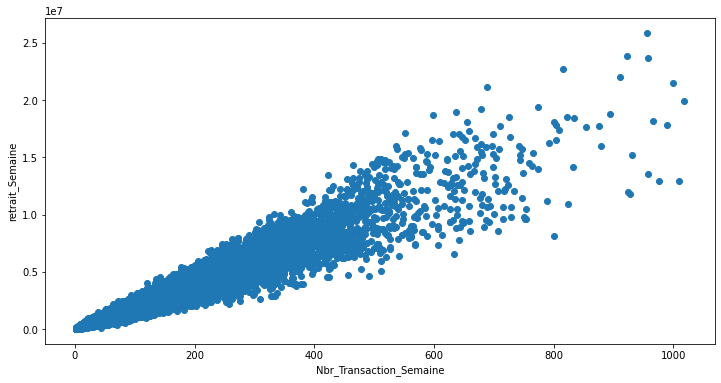

In [4]:
fig, ax=plt.subplots(figsize=(12,6))
ax.scatter(df['Nbr_Transaction_Semaine'],df['retrait_Semaine'])
ax.set_xlabel('Nbr_Transaction_Semaine')
ax.set_ylabel('retrait_Semaine')
plt.show()

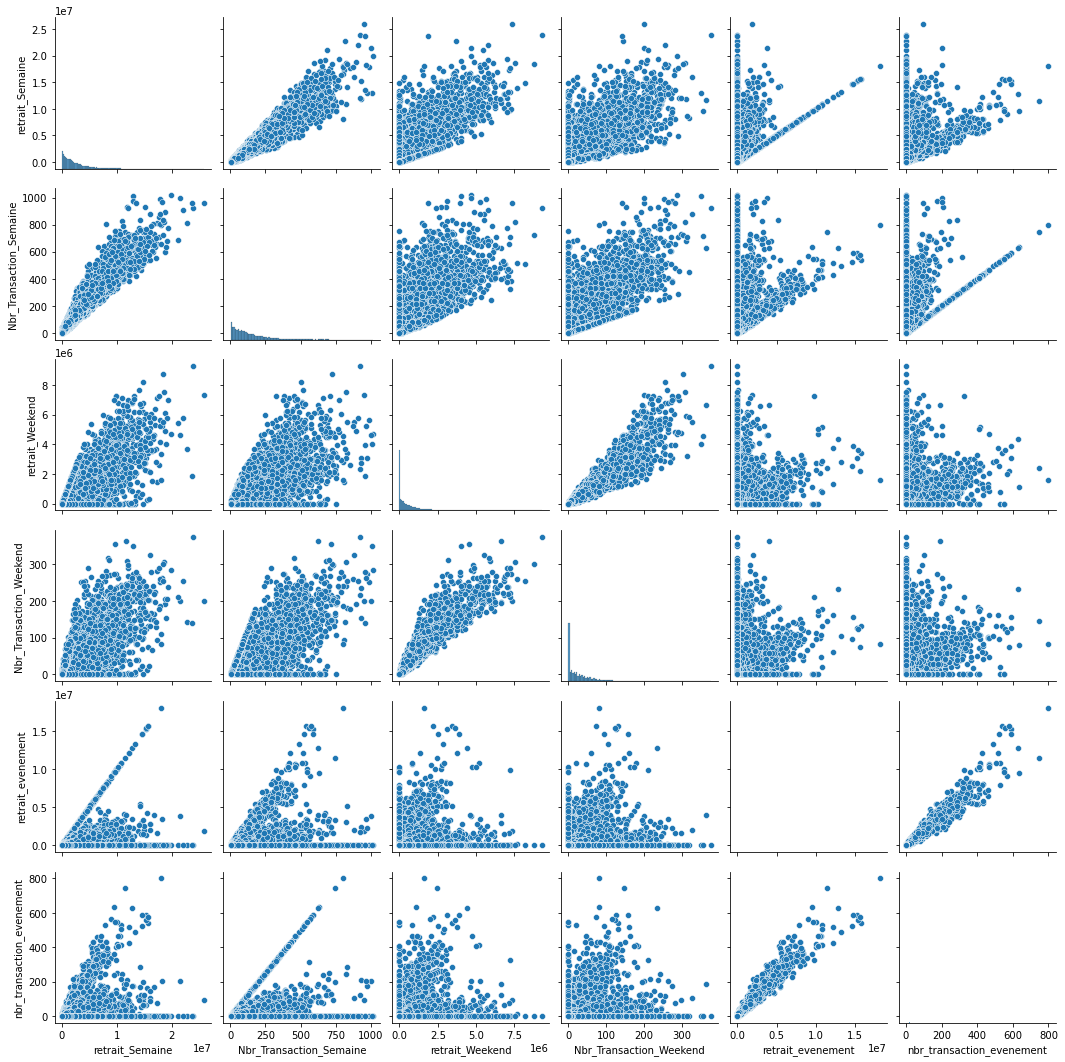

In [3]:
import seaborn as sns
import pandas as pd

# Créez un DataFrame avec uniquement les variables quantitatives
variables_quantitatives = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                           'Nbr_Transaction_Weekend', 'retrait_evenement', 'nbr_transaction_evenement']
df_quantitatives = df[variables_quantitatives]

# Utilisez la fonction pairplot pour tracer les graphiques de dispersion entre les variables quantitatives
sns.pairplot(df_quantitatives, kind="scatter")


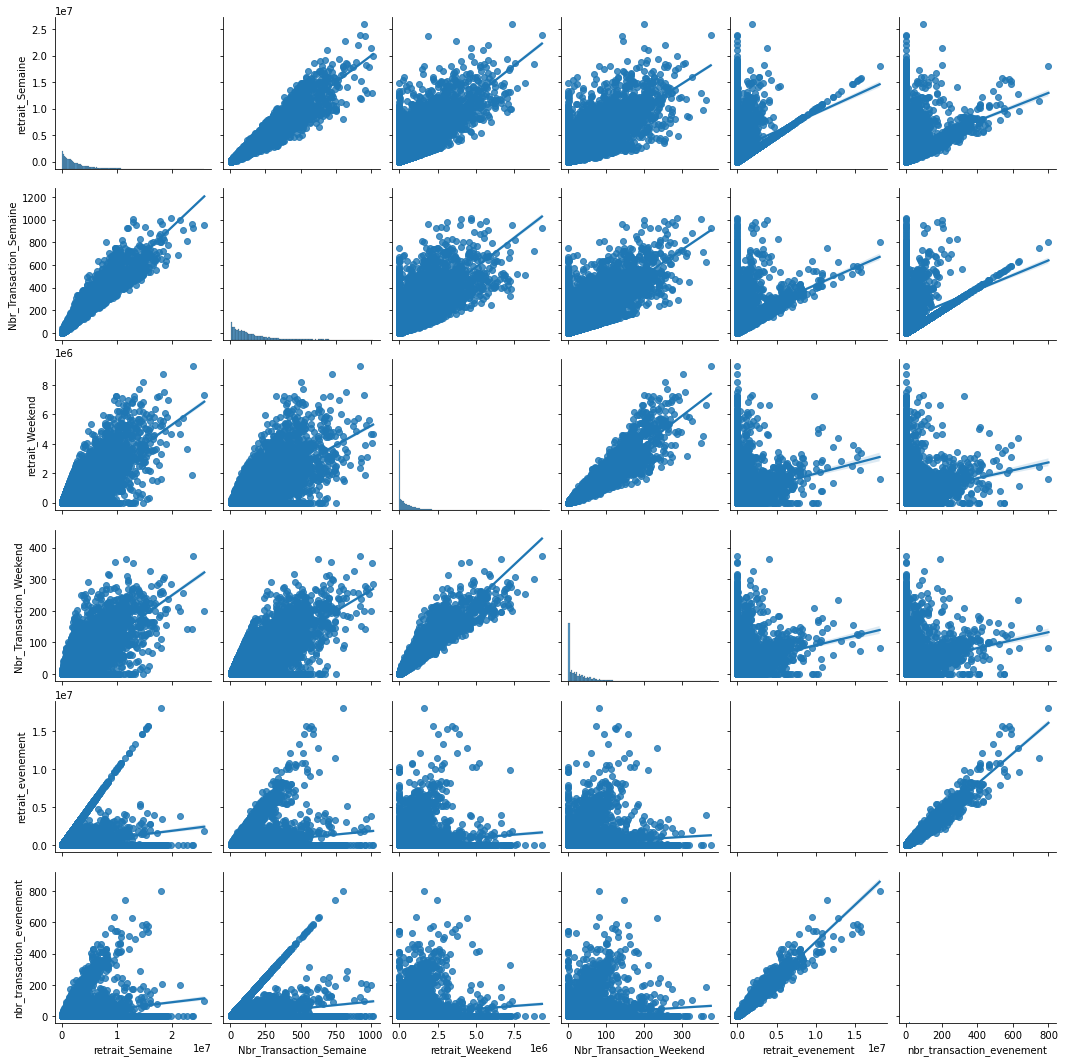

In [2]:
import seaborn as sns
import pandas as pd

variables_quantitatives = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                           'Nbr_Transaction_Weekend', 'retrait_evenement', 'nbr_transaction_evenement']
df_quantitatives = df[variables_quantitatives]
sns.pairplot(df_quantitatives, kind="reg")


### interprétation

##### 1) retrait VS nbr_transactions: 
lorsque le nombre de transactions augmente le retrait augmente également. Cela signifie qu’il existe une corrélation positive entre ces deux variables (relation lineaire).

##### 2) retrait_semaine VS retrait_weekend:
Lors de la premiere semaine y'avait pas de weekend ce qui explique le fait que le retrait semaine augmente sachant que le retrait weekend ne varie pas. 
sinon en general lorsque le nombre de retraits pendant les weekends augmente, le nombre de retraits pour la semaine d'après augmente également. Cela signifie qu’il existe une corrélation positive entre ces deux variables (relation lineaire).

##### 3) retrait_semaine VS retrait_evenement:
la droite de regression montre une tendance génerale mais elle indique une augmentation plus lente des retraits liés à des événements lorsque le nombre de retraits hebdomadaires augmente.


In [6]:
# Corrélation de spearman
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
spearmanr(df['retrait_Semaine'], df['Nbr_Transaction_Semaine'])

SpearmanrResult(correlation=0.9776930171518842, pvalue=0.0)

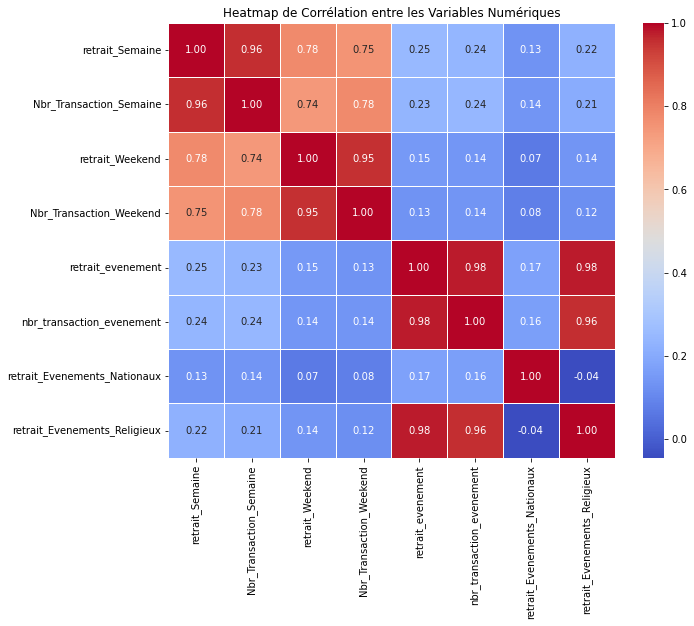

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables numériques
df_numerique = df[['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'Nbr_Transaction_Weekend', 'retrait_evenement', 'nbr_transaction_evenement','retrait_Evenements_Nationaux','retrait_Evenements_Religieux']]

# Calculer la matrice de corrélation
corr_matrix = df_numerique.corr()

# Créer une heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation entre les Variables Numériques')
plt.show()

## Analyse des liaisons entre deux variables qualitatives:

#### saison VS plage_horaire:

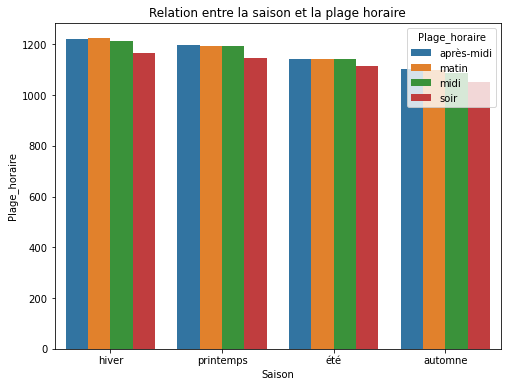

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='saison', hue='Plage_horaire')
plt.xlabel('Saison')
plt.ylabel('Plage_horaire')
plt.title('Relation entre la saison et la plage horaire')
plt.show()

In [10]:
# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.saison, df.Plage_horaire)

print(tableau_contingence)

Plage_horaire  après-midi  matin  midi  soir
saison                                      
automne              1103   1098  1087  1052
hiver                1222   1224  1213  1164
printemps            1198   1195  1193  1146
été                  1142   1142  1143  1115


##### Test du chi-carré:

In [11]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.saison, df.Plage_horaire)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)


Test du Chi carré :
Valeur de Chi carré : 0.33665112141339815
P-value : 0.9999945153455463


La valeur de Chi carré indique à quel point les valeurs observées dans le tableau de contingence diffèrent des valeurs attendues si les variables étaient indépendantes. Plus précisément, elle mesure la force de l'association entre les variables.

la valeur de chi carré est faible ce qui indique une association plus faible entre les variables saison et plage_horaire.

la p-value > 0.05 signifie qu'il n'y a pas d'association significative entre les variables "saison" et "Plage_horaire".

#### evenements VS saison:

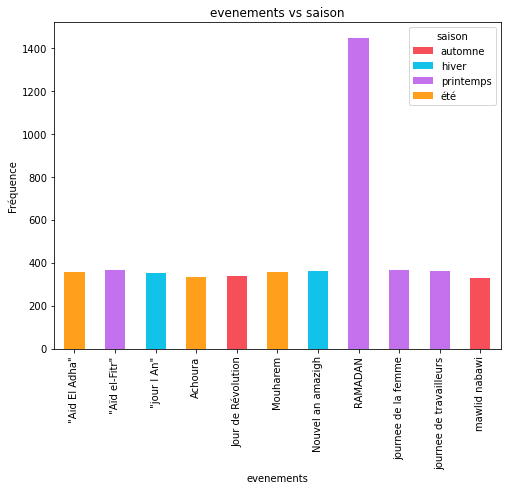

In [21]:
import matplotlib.pyplot as plt
pd.crosstab(df.evenements, df.saison).plot(kind="bar", stacked=True, figsize=(8, 6), 
                                              color=['#f64f59', '#12c2e9', '#c471ed', '#ff9f1c'])

plt.title('evenements vs saison')
plt.xlabel('evenements')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.evenements, df.saison)

print(tableau_contingence)

saison                   automne  hiver  printemps  été
evenements                                             
"Aid El Adha"                  0      0          0  357
"Aïd el-Fitr"                  0      0        366    0
"jour l An"                    0    353          0    0
Achoura                        0      0          0  335
Jour de Révolution           337      0          0    0
Mouharem                       0      0          0  355
Nouvel an amazigh              0    361          0    0
RAMADAN                        0      0       1446    0
journee de la femme            0      0        365    0
journee de travailleurs        0      0        361    0
mawlid nabawi                329      0          0    0


In [22]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.evenements, df.saison)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

# Afficher les résultats du test
print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)

Test du Chi carré :
Valeur de Chi carré : 14895.0
P-value : 0.0


Les résultats du test indiquent une forte association entre les variables saison et evenements avec une valeur de Chi carré élevée, et la p-value très faible egale a 0  indique une forte certitude que cette association n'est pas due au hasard.

#### codeWilaya VS Gab_Code:

In [24]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.CodeWilaya, df.Gab_Code)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

# Afficher les résultats du test
print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)

Test du Chi carré :
Valeur de Chi carré : 424051.0
P-value : 0.0


Les résultats du test indiquent une forte association entre ces deux variables.

#### position_Geographique VS Gab_Code:

In [25]:
from scipy.stats import chi2_contingency

# Créer le tableau de contingence
tableau_contingence = pd.crosstab(df.position_Geographique, df.Gab_Code)

# Effectuer le test du chi carré
chi2, p_value, _, _ = chi2_contingency(tableau_contingence)

# Afficher les résultats du test
print("Test du Chi carré :")
print("Valeur de Chi carré :", chi2)
print("P-value :", p_value)

Test du Chi carré :
Valeur de Chi carré : 55311.0
P-value : 0.0


## Analyse des liaisons entre une variable quantitative et une variable qualitative:

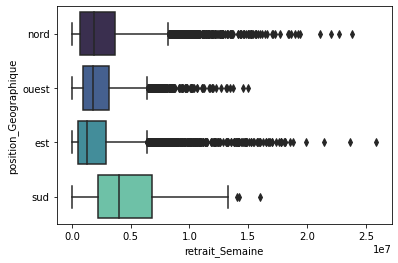

In [47]:
sns.boxplot(x="retrait_Semaine", y="position_Geographique", data=df, palette="mako");

Les résultats observés semblent être illogiques, ce qui suggère que la présence d'outliers a probablement faussé les résultats.

In [46]:
# Utiliser groupby pour regrouper les données par position géographique et calculer la somme des retraits par semaine
somme_retraits_par_position = df.groupby('position_Geographique')['retrait_Semaine'].sum()

print(somme_retraits_par_position)


position_Geographique
est      11449691000
nord     23582917000
ouest     8975405000
sud       1925777000
Name: retrait_Semaine, dtype: int64
